In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_aesthetics(image_path):
    # Load the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply thresholding to the gray image
    ret, thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    # Find the edges in the thresholded image
    edges = cv2.Canny(thresholded, 50, 150, apertureSize=3)
    # Find the lines in the image
    lines = cv2.HoughLines(edges, 1, np.pi/180, 60)
    # # Apply Gaussian blur with a smaller kernel size
    # blurred = cv2.GaussianBlur(gray, (1,1), 0)
    plt.figure()
    plt.imshow(thresholded, cmap='gray')
    plt.title("thresholded")
    plt.show()
    plt.figure()
    plt.imshow(edges, cmap='gray')
    plt.title("edges")
    plt.show()
    # Find the lines in the image
    height, width, _ = image.shape
    diagonal = np.sqrt(height**2 + width**2)
    
    # Initialize variables to store the angles and positions of the lines
    angles = []
    positions = []
    if len(lines) == 0:
        print("No lines detected for analisys. Look at the parameters of cv2.HoughLines")
        return 0
    for line in lines:
        rho, theta = line[0]
        angles.append(theta)
        x0 = rho * np.cos(theta)
        y0 = rho * np.sin(theta)
        x1 = int(x0 + diagonal * (-np.sin(theta)))
        y1 = int(y0 + diagonal * (np.cos(theta)))
        x2 = int(x0 - diagonal * (-np.sin(theta)))
        y2 = int(y0 - diagonal * (np.cos(theta)))
        positions.append(((x1, y1), (x2, y2)))
    
    # Calculate the aesthetics score
    score = 0
    if len(angles) > 0:
        # Rule of Thirds
        score += sum(abs(angle - (np.pi/3)) < (np.pi/18) for angle in angles)
        score += sum(abs(angle - (2*np.pi/3)) < (np.pi/18) for angle in angles)

        # Golden Mean
        score += sum(abs(angle - (np.pi/4)) < (np.pi/18) for angle in angles)
        score += sum(abs(angle - (3*np.pi/4)) < (np.pi/18) for angle in angles)
        
        # Golden Triangles
        for pos1 in positions:
            for pos2 in positions:
                if pos1 == pos2:
                    continue
                pos1_x, pos1_y = pos1[0]
                pos2_x, pos2_y = pos2[0]
                if pos2_x - pos1_x == 0:
                    slope1 = 999999999
                else:
                    slope1 = (pos2_y - pos1_y) / (pos2_x - pos1_x)
                pos1_x, pos1_y = pos1[1]
                pos2_x, pos2_y = pos2[1]
                if pos2_x - pos1_x == 0:
                    slope2 = 999999999
                else:
                    slope2 = (pos2_y - pos1_y) / (pos2_x - pos1_x)
                if abs(slope1 + slope2) < 0.1:
                    score += 1
    return score

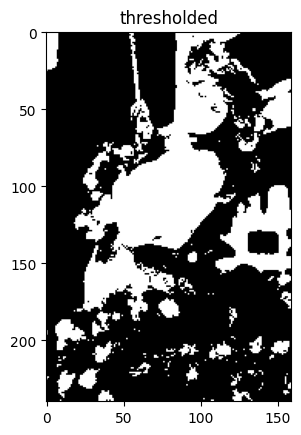

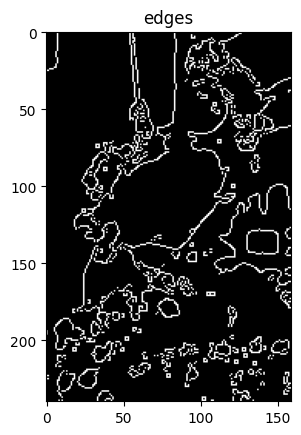

In [13]:
path = "dataset_test/test.jpg"
path = "dataset/17700322054_1c4fdaa034_m.jpg"
score = calculate_aesthetics(path)